Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 1.000000000
Epoch: 0002, Cost: 2.000000000
Epoch: 0003, Cost: 3.000000000
Epoch: 0004, Cost: 4.000000000
Epoch: 0005, Cost: 5.000000000
Epoch: 0006, Cost: 6.000000000
Epoch: 0007, Cost: 7.000000000
Epoch: 0008, Cost: 8.000000000
Epoch: 0009, Cost: 9.000000000
Epoch: 0010, Cost: 10.000000000
Epoch: 0011, Cost: 11.000000000
Epoch: 0012, Cost: 12.000000000
Epoch: 0013, Cost: 13.000000000
Epoch: 0014, Cost: 14.000000000
Epoch: 0015, Cost: 15.000000000
Epoch: 0016, Cost: 16.000000000
Epoch: 0017, Cost: 17.000000000
Epoch: 0018, Cost: 18.000000000
Epoch: 0019, Cost: 19.000000000
Epoch: 0020, Cost: 20.000000000
Epoch: 0021, Cost: 21.000000000
Epoch: 0022, Cost: 22.000000000
Epoch: 0023, Cost: 23.000000000
Epoch: 0024, Cost: 24.000000000
Epoch: 0025, Cost: 25.000000000
Epoch: 0026, Co

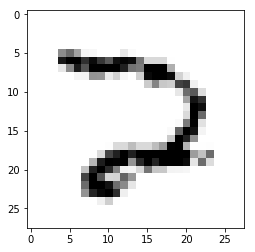

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# train my model
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {0:04d}, Cost: {0:.9f}".format(epoch+1, avg_cost))

    print("Learning Finished!")

    # Test model and check accuracy
    print("Accuracy:",sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print("Prediction: ",sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}))

    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28),cmap="Greys",interpolation="nearest")
    plt.show()